In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set(style="darkgrid")

In [2]:
train = pd.read_csv(r'train_fNxu4vz.csv')
test = pd.read_csv(r'test_fjtUOL8.csv')

In [3]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.00000,not verified,car,18.37000,0,nan,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,nan,VERIFIED - income,debt_consolidation,14.93000,0,17.00000,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88000,0,nan,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.00000,VERIFIED - income source,debt_consolidation,14.34000,3,nan,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.00000,VERIFIED - income source,debt_consolidation,22.17000,1,nan,19,30,Female,1


In [4]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.00000,VERIFIED - income,debt_consolidation,12.87000,0,68.00000,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.00000,not verified,credit_card,11.37000,0,nan,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.00000,VERIFIED - income,debt_consolidation,6.83000,2,nan,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.00000,VERIFIED - income source,debt_consolidation,7.76000,0,nan,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.00000,not verified,debt_consolidation,9.62000,0,26.00000,9,21,Male


In [5]:
train.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [6]:
test.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [7]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.00000,139207.00000,164309.00000,164309.00000,75930.00000,164309.00000,164309.00000,164309.00000
mean,10082155.00000,73331.15943,17.20719,0.78170,34.22936,11.19382,25.06767,2.15895
std,47432.06703,60377.49829,7.84508,1.03475,21.76118,4.99181,11.58307,0.73836
min,10000001.00000,4000.00000,0.00000,0.00000,0.00000,0.00000,2.00000,1.00000
25%,10041078.00000,45000.00000,11.37000,0.00000,16.00000,8.00000,17.00000,2.00000
50%,10082155.00000,63000.00000,16.84000,0.00000,31.00000,10.00000,23.00000,2.00000
75%,10123232.00000,88697.50000,22.78000,1.00000,50.00000,14.00000,32.00000,3.00000
max,10164309.00000,7500000.00000,39.99000,8.00000,180.00000,76.00000,156.00000,3.00000


In [8]:
# Checking for class imbalance
train['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

In [9]:
df = train.append(test)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273850 entries, 0 to 109540
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  273850 non-null  int64  
 1   Loan_Amount_Requested    273850 non-null  object 
 2   Length_Employed          261543 non-null  object 
 3   Home_Owner               231790 non-null  object 
 4   Annual_Income            231850 non-null  float64
 5   Income_Verified          273850 non-null  object 
 6   Purpose_Of_Loan          273850 non-null  object 
 7   Debt_To_Income           273850 non-null  float64
 8   Inquiries_Last_6Mo       273850 non-null  int64  
 9   Months_Since_Deliquency  126612 non-null  float64
 10  Number_Open_Accounts     273850 non-null  int64  
 11  Total_Accounts           273850 non-null  int64  
 12  Gender                   273850 non-null  object 
 13  Interest_Rate            164309 non-null  float64
dtypes: f

In [11]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.00000,not verified,car,18.37000,0,nan,9,14,Female,1.00000
1,10000002,"30,000",4 years,Mortgage,nan,VERIFIED - income,debt_consolidation,14.93000,0,17.00000,12,24,Female,3.00000
2,10000003,"24,725",7 years,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88000,0,nan,12,16,Male,3.00000
3,10000004,"16,000",< 1 year,NaN,56160.00000,VERIFIED - income source,debt_consolidation,14.34000,3,nan,16,22,Male,3.00000
4,10000005,"17,000",8 years,Own,96000.00000,VERIFIED - income source,debt_consolidation,22.17000,1,nan,19,30,Female,1.00000


In [12]:
df.tail()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
109536,10273846,"15,000",9 years,Mortgage,120000.00000,VERIFIED - income,other,8.15000,2,32.00000,13,57,Male,nan
109537,10273847,"9,600",10+ years,Mortgage,125000.00000,not verified,credit_card,9.08000,1,17.00000,9,34,Male,nan
109538,10273848,"2,000",5 years,Rent,37850.00000,not verified,credit_card,11.60000,0,nan,10,11,Male,nan
109539,10273849,"2,125",6 years,Rent,30000.00000,not verified,other,24.88000,0,nan,5,6,Male,nan
109540,10273850,"15,000",2 years,Mortgage,137000.00000,not verified,medical,8.66000,1,60.00000,8,17,Male,nan


In [13]:
df.isna().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

In [14]:
df.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate              float64
dtype: object

## Univariate Analysis

#### 1- Loan_Amount_Requested

In [15]:
df['Loan_Amount_Requested'].head()

0     7,000
1    30,000
2    24,725
3    16,000
4    17,000
Name: Loan_Amount_Requested, dtype: object

In [16]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(',', '')

In [17]:
df["Loan_Amount_Requested"] = df["Loan_Amount_Requested"].astype(str).astype(int)
print(df['Loan_Amount_Requested'].dtypes)

int32


In [18]:
df.head(2)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.00000,not verified,car,18.37000,0,nan,9,14,Female,1.00000
1,10000002,30000,4 years,Mortgage,nan,VERIFIED - income,debt_consolidation,14.93000,0,17.00000,12,24,Female,3.00000


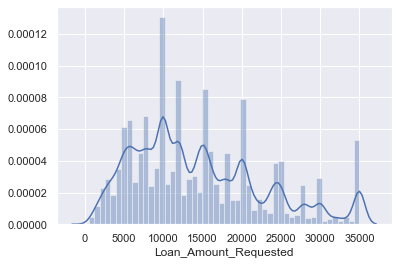

In [19]:
sns.distplot(df['Loan_Amount_Requested'],hist=True)

In [20]:
df['Loan_Amount_Requested'].describe()

count   273850.00000
mean     14352.99224
std       8289.03670
min        500.00000
25%       8000.00000
50%      12000.00000
75%      20000.00000
max      35000.00000
Name: Loan_Amount_Requested, dtype: float64

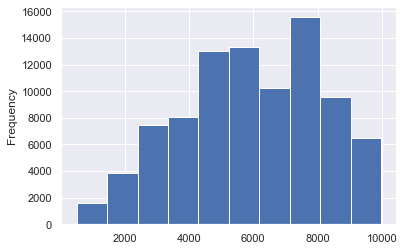

In [21]:
df[df['Loan_Amount_Requested'] < 10000]['Loan_Amount_Requested'].plot(kind='hist')

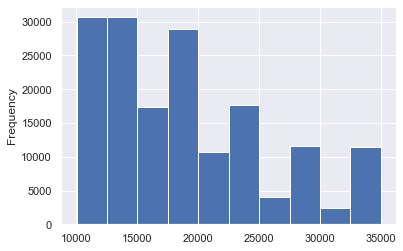

In [22]:
df[df['Loan_Amount_Requested'] > 10001]['Loan_Amount_Requested'].plot(kind='hist')

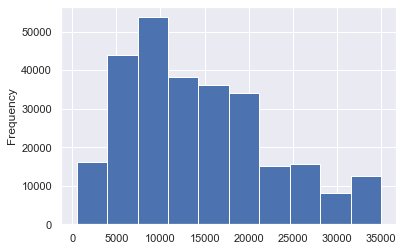

In [23]:
df['Loan_Amount_Requested'].plot(kind = 'hist')

#### 2. Length_employed

In [24]:
df['Length_Employed'].value_counts(dropna=False)

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
NaN          12307
9 years      10503
Name: Length_Employed, dtype: int64

#### 3. Home_Owner

In [25]:
df['Home_Owner'].value_counts(dropna=False)

Mortgage    117270
Rent         93542
NaN          42060
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

can be encoded as Yes/No/Others

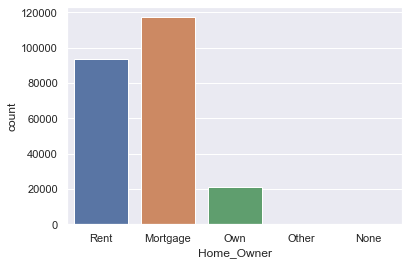

In [26]:
sns.countplot(x='Home_Owner',data=df)

#### 4.Annual_Income

In [27]:
df['Annual_Income'].dtypes

dtype('float64')

In [28]:
df['Annual_Income'].describe()

count    231850.00000
mean      73392.79398
std       58529.83549
min        3000.00000
25%       45000.00000
50%       63000.00000
75%       89000.00000
max     7500000.00000
Name: Annual_Income, dtype: float64

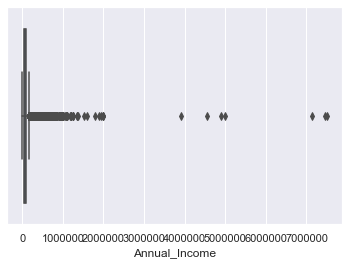

In [29]:
sns.boxplot(df['Annual_Income'])

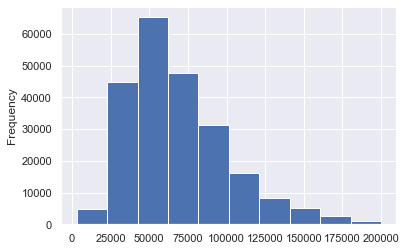

In [30]:
df[df['Annual_Income'] < 200000]['Annual_Income'].plot(kind='hist')

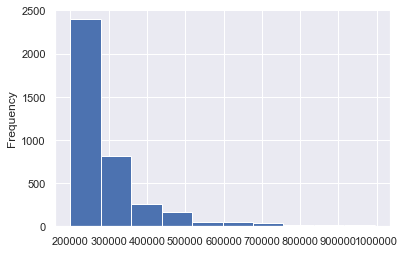

In [31]:
df[(df['Annual_Income'] > 200001) & (df['Annual_Income'] < 999999)]['Annual_Income'].plot(kind='hist')

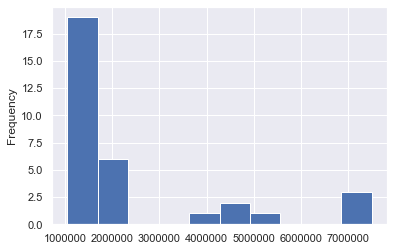

In [32]:
df[df['Annual_Income'] > 1000000]['Annual_Income'].plot(kind='hist')

In [33]:
df[df['Annual_Income'] > 1000000]['Annual_Income'].value_counts()

1200000.00000    4
1100000.00000    3
2000000.00000    3
1250000.00000    2
1350000.00000    2
1900000.00000    1
1362000.00000    1
1254000.00000    1
4900000.00000    1
5000000.00000    1
3900000.00000    1
1080000.00000    1
4560077.00000    1
1084773.00000    1
7446395.00000    1
1782000.00000    1
7141778.00000    1
1950000.00000    1
1050000.00000    1
1510000.00000    1
7500000.00000    1
1176000.00000    1
1600000.00000    1
Name: Annual_Income, dtype: int64

"These are outliers"

In [34]:
# df[df['Annual_Income'] > 400000].info()
len(df[df['Annual_Income'] > 400000])

443

#### 5.Income_Verified

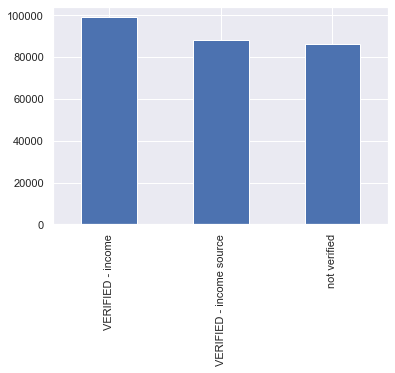

In [35]:
df['Income_Verified'].value_counts(dropna=False).sort_index().plot(kind='bar')

#### 6.Purpose_Of_Loan

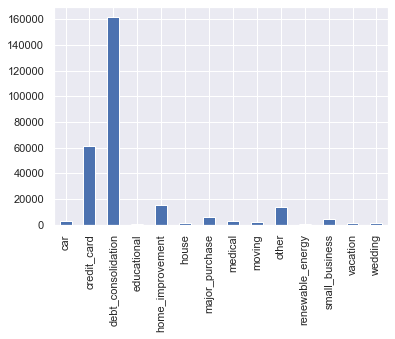

In [36]:
df['Purpose_Of_Loan'].value_counts().sort_index().plot(kind='bar')

#### 7. Debt_To_Income

In [37]:
df['Debt_To_Income'].describe()

count   273850.00000
mean        17.21590
std          7.84597
min          0.00000
25%         11.36000
50%         16.85000
75%         22.78000
max         39.99000
Name: Debt_To_Income, dtype: float64

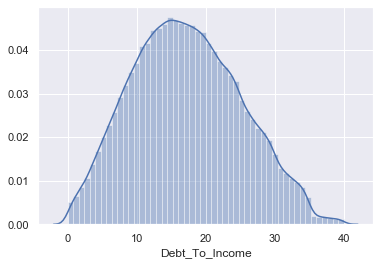

In [38]:
sns.distplot(df['Debt_To_Income'],hist=True)

##### normal distribution

#### 8. Inquiries_Last_6Mo

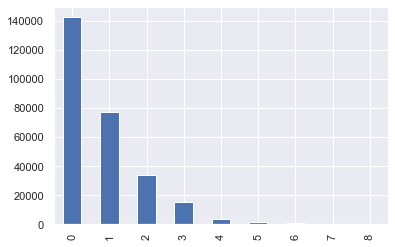

In [39]:
df['Inquiries_Last_6Mo'].value_counts().sort_index().plot(kind='bar')

#### 9. Number_Open_Accounts

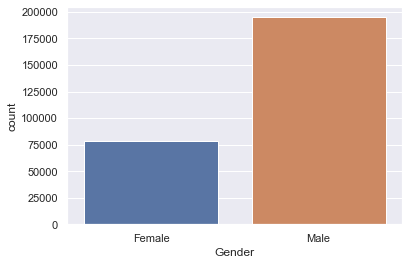

In [40]:
sns.countplot(x='Gender',data=df)

## Bi-Variate

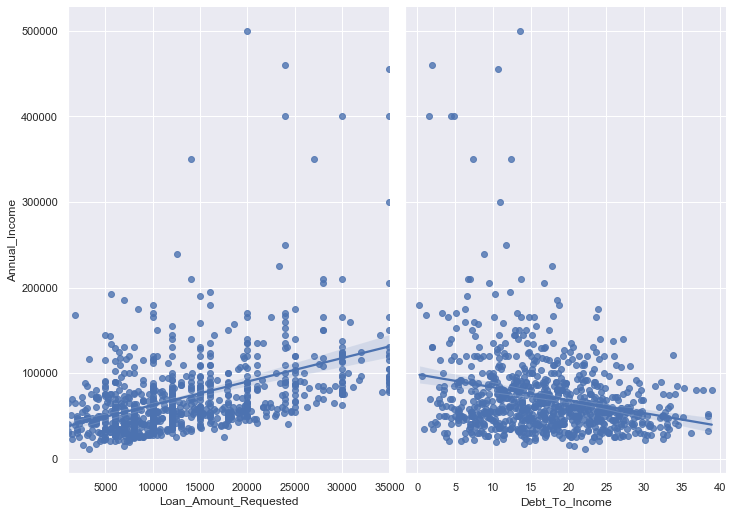

In [41]:
sns.pairplot(df.sample(1000), x_vars= ('Loan_Amount_Requested','Debt_To_Income'), y_vars='Annual_Income',height=7,aspect=0.7,kind='reg')

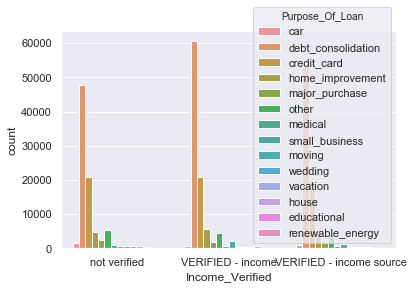

In [42]:
sns.countplot(x='Income_Verified', data=df,hue='Purpose_Of_Loan',orient ='h')

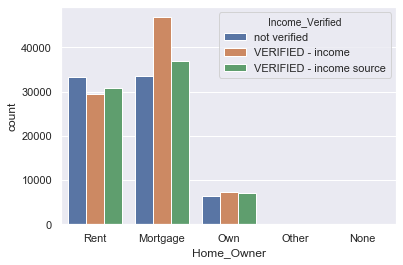

In [43]:
sns.countplot(x='Home_Owner', data=df,hue='Income_Verified',orient ='h')

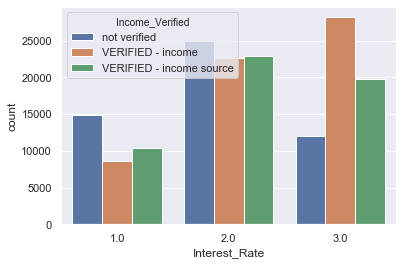

In [44]:
sns.countplot(x='Interest_Rate', data=df,hue='Income_Verified',orient ='h')

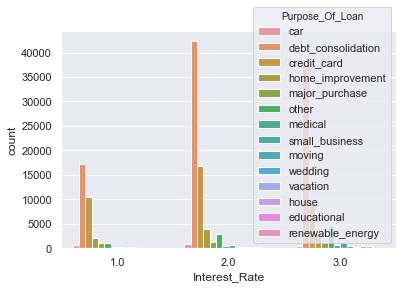

In [45]:
sns.countplot(x='Interest_Rate', data=df,hue='Purpose_Of_Loan',orient ='h')

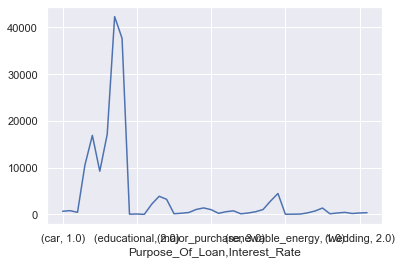

In [46]:
df.groupby('Purpose_Of_Loan')['Interest_Rate'].value_counts().sort_index().plot(kind='line')

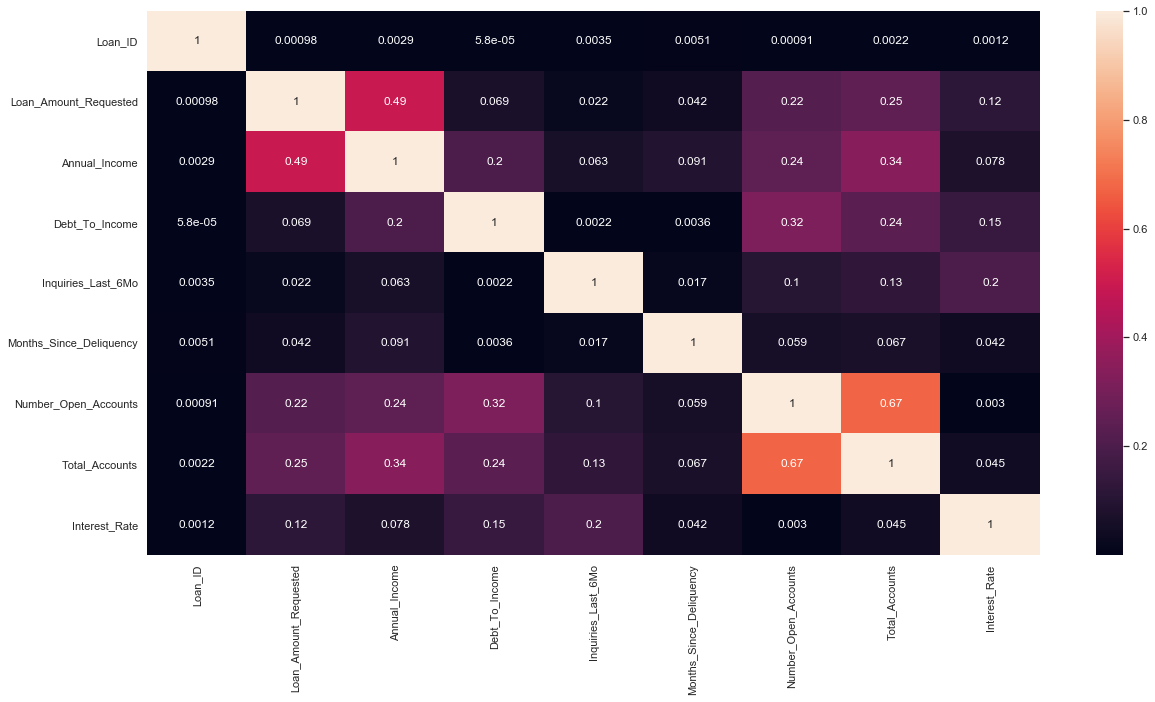

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method = 'spearman').abs(),annot=True)

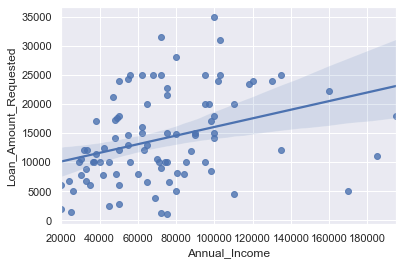

In [48]:
sns.regplot(x='Annual_Income',y='Loan_Amount_Requested',data=df.sample(100))

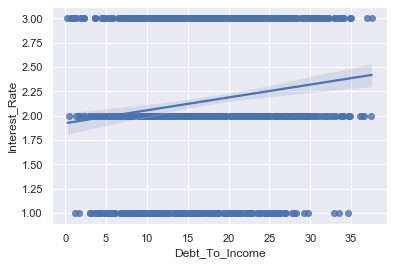

In [49]:
sns.regplot(x='Debt_To_Income',y='Interest_Rate',data=train.sample(1000))

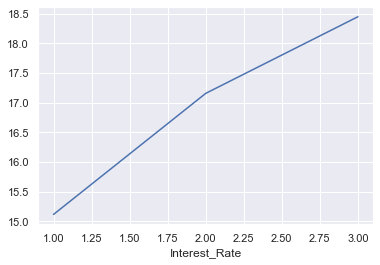

In [50]:
train.groupby('Interest_Rate')['Debt_To_Income'].mean().plot()

In [51]:
df.head(4)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.00000,not verified,car,18.37000,0,nan,9,14,Female,1.00000
1,10000002,30000,4 years,Mortgage,nan,VERIFIED - income,debt_consolidation,14.93000,0,17.00000,12,24,Female,3.00000
2,10000003,24725,7 years,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88000,0,nan,12,16,Male,3.00000
3,10000004,16000,< 1 year,NaN,56160.00000,VERIFIED - income source,debt_consolidation,14.34000,3,nan,16,22,Male,3.00000


In [52]:
df_int = df[['Annual_Income','Loan_Amount_Requested','Debt_To_Income','Purpose_Of_Loan','Interest_Rate']].groupby('Purpose_Of_Loan').agg({'Debt_To_Income':'mean','Loan_Amount_Requested':'mean','Annual_Income':'median','Interest_Rate':'count'}).sort_index()

In [53]:
df_int

,Debt_To_Income,Loan_Amount_Requested,Annual_Income,Interest_Rate
Purpose_Of_Loan,,,,
car,13.25732,8172.48333,55565.00000,1885
credit_card,17.53481,14761.91077,62000.00000,36684
debt_consolidation,17.90247,15153.69154,63000.00000,97101
educational,11.43593,6995.72864,44000.00000,121
home_improvement,14.45682,13892.85506,72500.00000,9269
house,13.18008,15050.94985,67600.00000,773
major_purchase,13.66772,10515.94450,62000.00000,3435
medical,16.20747,8973.27193,60000.00000,1541
moving,15.12541,7407.52239,54000.00000,974


In [54]:
df_int.reset_index()

,Purpose_Of_Loan,Debt_To_Income,Loan_Amount_Requested,Annual_Income,Interest_Rate
0,car,13.25732,8172.48333,55565.00000,1885
1,credit_card,17.53481,14761.91077,62000.00000,36684
2,debt_consolidation,17.90247,15153.69154,63000.00000,97101
3,educational,11.43593,6995.72864,44000.00000,121
4,home_improvement,14.45682,13892.85506,72500.00000,9269
5,house,13.18008,15050.94985,67600.00000,773
6,major_purchase,13.66772,10515.94450,62000.00000,3435
7,medical,16.20747,8973.27193,60000.00000,1541
8,moving,15.12541,7407.52239,54000.00000,974
9,other,15.73115,9608.91593,57000.00000,8346


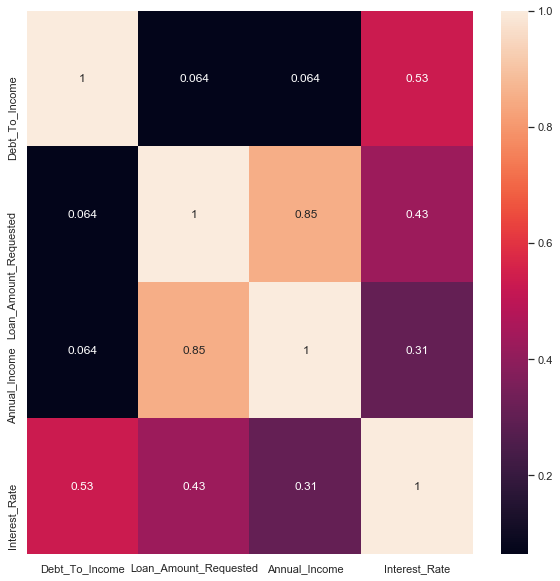

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df_int.corr(method = 'spearman').abs(),annot=True)

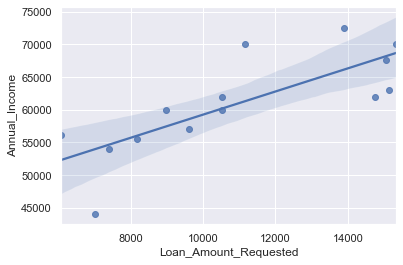

In [56]:
p = sns.regplot(x='Loan_Amount_Requested',y='Annual_Income',data=df_int)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
linreg = LinearRegression()

In [59]:
X = df_int['Loan_Amount_Requested']
y = df_int['Annual_Income']

In [60]:
linreg.fit(X[:,None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print(linreg.coef_)
print(linreg.intercept_)

[1.7681775]
41586.508829742175


In [62]:
df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [63]:
df.groupby('Home_Owner')['Annual_Income'].median()

Home_Owner
Mortgage   72000.00000
None       64000.00000
Other      59000.00000
Own        55000.00000
Rent       54000.00000
Name: Annual_Income, dtype: float64

#### Imputation for Annual_income

In [64]:
df['Annual_Income_1'] = df['Loan_Amount_Requested']

In [65]:
df['Annual_Income_1'] = df['Annual_Income_1']*1.7681775

In [66]:
df['Annual_Income_1'] = df['Annual_Income_1']+41586.508829742175

In [67]:
df['Annual_Income_fin'] = df.apply(lambda x: x['Annual_Income_1'] if pd.isnull(x['Annual_Income']) else x['Annual_Income'],axis=1)

In [68]:
df.isna().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
Annual_Income_1                 0
Annual_Income_fin               0
dtype: int64

In [69]:
df[['Annual_Income','Annual_Income_fin']].head(10)

,Annual_Income,Annual_Income_fin
0,68000.00000,68000.00000
1,nan,94631.83383
2,75566.40000,75566.40000
3,56160.00000,56160.00000
4,96000.00000,96000.00000
5,30000.00000,30000.00000
6,85000.00000,85000.00000
7,115000.00000,115000.00000
8,nan,52726.02708
9,163000.00000,163000.00000


#### Imputation for Home_owner

In [70]:
df['Home_Owner'].value_counts()

Mortgage    117270
Rent         93542
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

In [71]:
df['Home_Owner_adj'] = df['Home_Owner'].replace({'Other':'Others','None':'Others'})

In [72]:
df['Home_Owner_adj'].value_counts()

Mortgage    117270
Rent         93542
Own          20879
Others          99
Name: Home_Owner_adj, dtype: int64

In [73]:
df['Home_Owner_adj'].fillna(value='Others',inplace=True)

In [74]:
df['Home_Owner_adj'].value_counts()

Mortgage    117270
Rent         93542
Others       42159
Own          20879
Name: Home_Owner_adj, dtype: int64

#### Cleaning & Imputation for Length_Employed

In [75]:
df['Length_Employed'].value_counts()

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

In [76]:
df['Length_Employed_cleaned'] = df['Length_Employed'].replace({'10+ years':11,'2 years':2,'3 years':3,'< 1 year':0,'5 years':5,'1 year':1,'4 years':4,'7 years':7,'6 years':6,'8 years':8,'9 years':9})

In [77]:
df['Length_Employed_cleaned'].value_counts()

11.00000    88328
2.00000     24420
3.00000     21478
0.00000     21133
5.00000     18042
1.00000     17336
4.00000     16393
7.00000     15444
6.00000     15351
8.00000     13115
9.00000     10503
Name: Length_Employed_cleaned, dtype: int64

In [78]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [79]:
impute_it = IterativeImputer()
#impute_knn = KNNImputer(n_neighbors=3)

In [80]:
df['Length_Employed_cleaned'] = impute_it.fit_transform(df[['Length_Employed_cleaned']])

In [81]:
df['Length_Employed_cleaned'].value_counts().sort_index()

0.00000     21133
1.00000     17336
2.00000     24420
3.00000     21478
4.00000     16393
5.00000     18042
6.00000     15351
6.33801     12307
7.00000     15444
8.00000     13115
9.00000     10503
11.00000    88328
Name: Length_Employed_cleaned, dtype: int64

In [82]:
df['Length_Employed_cleaned'].isna().sum()

0

In [83]:
df_copy = df.drop(['Loan_ID','Length_Employed','Home_Owner','Annual_Income','Months_Since_Deliquency','Annual_Income_1'],axis=1)

In [84]:
df_copy = df[['Loan_Amount_Requested','Length_Employed_cleaned','Home_Owner_adj','Annual_Income_fin','Income_Verified','Purpose_Of_Loan','Debt_To_Income','Inquiries_Last_6Mo','Number_Open_Accounts','Total_Accounts','Gender','Interest_Rate']]

In [85]:
df_copy.head()

,Loan_Amount_Requested,Length_Employed_cleaned,Home_Owner_adj,Annual_Income_fin,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,0.00000,Rent,68000.00000,not verified,car,18.37000,0,9,14,Female,1.00000
1,30000,4.00000,Mortgage,94631.83383,VERIFIED - income,debt_consolidation,14.93000,0,12,24,Female,3.00000
2,24725,7.00000,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88000,0,12,16,Male,3.00000
3,16000,0.00000,Others,56160.00000,VERIFIED - income source,debt_consolidation,14.34000,3,16,22,Male,3.00000
4,17000,8.00000,Own,96000.00000,VERIFIED - income source,debt_consolidation,22.17000,1,19,30,Female,1.00000


In [86]:
df_copy.isna().sum()

Loan_Amount_Requested           0
Length_Employed_cleaned         0
Home_Owner_adj                  0
Annual_Income_fin               0
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

In [87]:
df_copy.dtypes

Loan_Amount_Requested        int32
Length_Employed_cleaned    float64
Home_Owner_adj              object
Annual_Income_fin          float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate              float64
dtype: object

In [88]:
train_cleaned = df_copy[df_copy['Interest_Rate'].isnull()!=True]

In [89]:
train_cleaned_1 = pd.get_dummies(train_cleaned,drop_first=True)

In [90]:
train_cleaned_1.head()

,Loan_Amount_Requested,Length_Employed_cleaned,Annual_Income_fin,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate,Home_Owner_adj_Others,Home_Owner_adj_Own,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,7000,0.00000,68000.00000,18.37000,0,9,14,1.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,4.00000,94631.83383,14.93000,0,12,24,3.00000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24725,7.00000,75566.40000,15.88000,0,12,16,3.00000,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16000,0.00000,56160.00000,14.34000,3,16,22,3.00000,1,0,...,0,0,0,0,0,0,0,0,0,1
4,17000,8.00000,96000.00000,22.17000,1,19,30,1.00000,0,1,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X = train_cleaned_1[train_cleaned_1['Interest_Rate'].isnull()!=True].drop(['Interest_Rate'], axis=1)
y = train_cleaned_1[train_cleaned_1['Interest_Rate'].isnull()!=True]['Interest_Rate']


In [92]:
print(X.shape)
print(y.shape)

(164309, 26)
(164309,)


In [93]:
test_cleaned = df_copy[df_copy['Interest_Rate'].isnull()==True].drop(['Interest_Rate'], axis=1)

In [94]:
test_cleaned_1 = pd.get_dummies(test_cleaned,drop_first=True)

In [95]:
test_cleaned_1.head()

,Loan_Amount_Requested,Length_Employed_cleaned,Annual_Income_fin,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Home_Owner_adj_Others,Home_Owner_adj_Own,Home_Owner_adj_Rent,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,27500,11.00000,129000.00000,12.87000,0,10,37,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26000,11.00000,110000.00000,11.37000,0,6,23,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6075,0.00000,75000.00000,6.83000,2,5,20,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,12000,11.00000,73000.00000,7.76000,0,6,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35000,0.00000,156000.00000,9.62000,0,9,21,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
test_cleaned_1.shape

(109541, 26)

## Feature selection using RFC_RFE_GradientBoostingClf

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [94]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=12,n_jobs=-1))
sel.fit(X_train,y_train)
sel.get_support()

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [95]:
X_train.columns

Index(['Loan_Amount_Requested', 'Length_Employed_cleaned', 'Annual_Income_fin',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts',
       'Total_Accounts', 'Home_Owner_adj_Others', 'Home_Owner_adj_Own',
       'Home_Owner_adj_Rent', 'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Gender_Male'],
      dtype='object')

In [96]:
features = X_train.columns[sel.get_support()]

In [97]:
features

Index(['Loan_Amount_Requested', 'Length_Employed_cleaned', 'Annual_Income_fin',
       'Debt_To_Income', 'Number_Open_Accounts', 'Total_Accounts'],
      dtype='object')

In [98]:
len(features)

6

In [99]:
np.mean(sel.estimator_.feature_importances_)

0.038461538461538464

In [100]:
sel.estimator_.feature_importances_

array([0.15300395, 0.08855199, 0.15945959, 0.178251  , 0.03720883,
       0.11587713, 0.13685371, 0.0145447 , 0.01014214, 0.01419057,
       0.01225192, 0.01868956, 0.00887669, 0.00739947, 0.00026578,
       0.00451806, 0.00121977, 0.00288799, 0.00192403, 0.00143892,
       0.00471722, 0.00026255, 0.00244511, 0.00134458, 0.00136808,
       0.02230667])

In [101]:
X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

In [102]:
def run_RandomForest(X_Train_rfc,X_test_rfc,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=12,n_jobs=-1)
    clf.fit(X_train_rfc,y_train)
    y_pred = clf.predict(X_test_rfc)
    print('Wt_F1_Score:', metrics.f1_score(y_test,y_pred,average='weighted'))


In [103]:
%%time
run_RandomForest(X_train_rfc,X_test_rfc,y_train,y_test)

Wt_F1_Score: 0.4391451253819641
Wall time: 7.33 s


### RFE

In [104]:
sel = RFE(RandomForestClassifier(n_estimators=100,random_state=12,n_jobs=-1),n_features_to_select=6)
sel.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=12,
                                     verbose=0, warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [105]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [106]:
%%time
run_RandomForest(X_train_rfe,X_test_rfe,y_train,y_test)

Wt_F1_Score: 0.4391451253819641
Wall time: 8.14 s


### Feature selection by gradient boosting Tree Importance

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
sel = RFE(GradientBoostingClassifier(n_estimators=100,random_state=12),n_features_to_select=6)
sel.fit(X_train,y_train)

RFE(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                         criterion='friedman_mse', init=None,
                                         learning_rate=0.1, loss='deviance',
                                         max_depth=3, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100,
                                         n_iter_no_change=None,
                                         presort='deprecated', random_state=12,
                                         subsample=1.0, tol=0.0001,
                                         validation_fra

In [141]:
sel.get_support()

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [142]:
features = X_train.columns[sel.get_support()]

In [143]:
features

Index(['Loan_Amount_Requested', 'Annual_Income_fin', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Income_Verified_not verified',
       'Purpose_Of_Loan_credit_card'],
      dtype='object')

In [144]:
len(features)

6

In [145]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [146]:
%%time
run_RandomForest(X_train_rfe,X_test_rfe,y_train,y_test)

Wt_F1_Score: 0.3519293071005403
Wall time: 6.21 s


## Without Feature selection

In [149]:
def run_RandomForest_sim(X_Train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=12,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Wt_F1_Score:', metrics.f1_score(y_test,y_pred,average='weighted'))

In [150]:
%%time
run_RandomForest_sim(X_train,X_test,y_train,y_test)

Wt_F1_Score: 0.49060023427882254
Wall time: 12.7 s


### Selecting optimal no of features

for index in range(1,27):
    sel = RFE(GradientBoostingClassifier(n_estimators=100,random_state=12),n_features_to_select=index)
    sel.fit(X_train,y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('selected Feature:', index)
    run_RandomForest(X_Train_rfe,X_test_rfe,y_train,y_test)
    print()

### Trying other Algo's

In [109]:
#  transformers = [
#               ("num", StandardScaler(), ['Loan_Amount_Requested', 'Length_Employed_cleaned','Annual_Income_fin','Debt_To_Income','Inquiries_Last_6Mo','Number_Open_Accounts','Total_Accounts']),
#               ("cat", OneHotEncoder(handle_unknown='ignore'), ['Home_Owner_adj', 'Income_Verified', 'Purpose_Of_Loan','Gender'])
#                ]

In [97]:
transformers =[("num", StandardScaler(), ['Loan_Amount_Requested', 'Length_Employed_cleaned','Annual_Income_fin','Debt_To_Income','Inquiries_Last_6Mo','Number_Open_Accounts','Total_Accounts'])]              

In [98]:
transformer = ColumnTransformer(transformers = transformers,remainder='passthrough')

#### Logistic Regression

In [159]:
logreg = LogisticRegression(multi_class='multinomial',random_state=12)

In [160]:
pipe_logreg = make_pipeline(transformer,logreg)

In [161]:
pipe_logreg.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Loan_Amount_Requested',
                                                   'Length_Employed_cleaned',
                                                   'Annual_Income_fin',
                                                   'Debt_To_Income',
                                                   'Inquiries_Last_6Mo',
                                                   'Number_Open_Accounts',
           

In [162]:
cross_val_score(pipe_logreg,X,y,cv=5,scoring='f1_weighted').mean()

0.48905683304079484

In [163]:
y_pred = pipe_logreg.predict(test_cleaned_1)

In [164]:
y_pred.shape

(109541,)

In [117]:
submission_logreg = pd.DataFrame()
submission_logreg['Loan_ID'] = df[df['Interest_Rate'].isnull()==True]['Loan_ID']
submission_logreg['Interest_Rate'] = y_pred

In [118]:
submission_logreg.to_csv('submission_logreg.csv', index=False, header=True)

### Decision Tree

In [119]:
# from sklearn.tree import DecisionTreeClassifier

In [120]:
# dt = DecisionTreeClassifier(ccp_alpha=0.001,random_state=14)
# pipe_dt = make_pipeline(transformer,dt)

In [121]:
# pipe_dt.fit(X,y)

In [122]:
# cross_val_score(pipe_dt,X,y,cv=5,scoring='f1_weighted').mean()

### RandomForest

In [123]:
# from sklearn.ensemble import RandomForestClassifier
# rf_clf = RandomForestClassifier(n_estimators =900,max_depth=25,random_state=42)

In [124]:
# pipe_rf = make_pipeline(transformer,rf_clf)

In [125]:
# pipe_rf.fit(X,y)

In [126]:
# cross_val_score(pipe_rf,X,y,cv=5,scoring='f1_weighted').mean()

In [127]:
# rf_pred = pipe_rf.predict(X_test)

In [128]:
# submission_RF = pd.DataFrame()
# submission_RF['Loan_ID'] = df[df['Interest_Rate'].isnull()==True]['Loan_ID']
# submission_RF['Interest_Rate'] = rf_pred

In [129]:
# submission_RF.to_csv('submission_RF.csv', index=False, header=True)

### XGBoost

In [99]:
import xgboost as xgb
from xgboost import XGBClassifier

In [100]:
clfxgb = XGBClassifier(max_depth=3,njobs=5,objective ='multi:softprob',eta=0.3,num_class=3)

In [101]:
pipe_xgb = make_pipeline(transformer,clfxgb)

In [102]:
pipe_xgb.fit(X,y)

[16:43:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Loan_Amount_Requested',
                                                   'Length_Employed_cleaned',
                                                   'Annual_Income_fin',
                                                   'Debt_To_Income',
                                                   'Inquiries_Last_6Mo',
                                                   'Number_Open_Acc...
               

In [103]:
cross_val_score(pipe_xgb,X,y,cv=5,scoring='f1_weighted').mean()

[16:44:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:44:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:44:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { njobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
 

0.5086605574631535

In [105]:
xgb_pred =  pipe_xgb.predict(test_cleaned_1)

In [136]:
submission_xgb = pd.DataFrame()
submission_xgb['Loan_ID'] = df[df['Interest_Rate'].isnull()==True]['Loan_ID']
submission_xgb['Interest_Rate'] = xgb_pred

In [137]:
submission_xgb.to_csv('submission_xgb.csv', index=False, header=True)

## Score on Leaderboard was 0.510391936106244 & Private Score 0.509992854557039